In [1]:
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
import mxnet as mx
from mxnet import gluon
from mxnet import ndarray as nd
from mxnet.gluon import nn, utils
from mxnet import autograd


/home/alexchen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = iter(x)
for i in a:
    first = i
    second = next(a, first)
    third = next(a,first)
    four = next(a, first)
    print(first)
    print(second)
    print(third)
    print(four)
    print("----")
    

1
2
3
4
----
5
6
7
8
----
9
10
9
9
----


In [3]:
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1,s2,s3), (s1,s2,s3,s4), (s2, s3,s4,s5), ..."
    a, b, c, d = tee(iterable, n=4)
    next(b, None)
    return zip(a, b)

In [4]:
batch_size = 128
n_mixture = 8
std = 0.025
radius = 1.0
latent_z_size =100
epochs = 2600

use_gpu = True
ctx = mx.gpu() if use_gpu else mx.cpu()

lr = 0.0002
beta1 = 0.5
dropout = 0.5

unroll_steps = 4

In [5]:
thetas = np.linspace(0, 2 * np.pi - 2 * np.pi / n_mixture, n_mixture)
centers = []
for i in range(0, len(thetas)):
    centers.append([radius * np.sin(thetas[i]), radius * np.cos(thetas[i])])
samples = []
for c in centers:
    samples.extend(np.random.normal(loc=c, scale=std, size=[32768, 2]).tolist())
#for s in range(len(samples)):
#    samples[s] = tf.convert_to_tensor(samples[s])
#for z in range(len(samples)):
#   samples[z] = [samples[z]]

#test output shape    
#o = np.array(samples)
#print(o.shape)
    
random.shuffle(samples)
samples = np.asarray(samples)
print(samples)
#print(samples.T[0:3])
train_data = mx.io.NDArrayIter(data = samples, batch_size = batch_size)

[[-0.7264489   0.67767115]
 [-0.70937502  0.72022448]
 [-1.0055553  -0.021935  ]
 ...
 [ 0.00606933 -0.96722391]
 [ 0.70437733 -0.70046346]
 [ 0.74701199 -0.72502963]]


262144
2
[[-0.7264489  -0.70937502 -1.0055553  ...  0.00606933  0.70437733
   0.74701199]
 [ 0.67767115  0.72022448 -0.021935   ... -0.96722391 -0.70046346
  -0.72502963]]


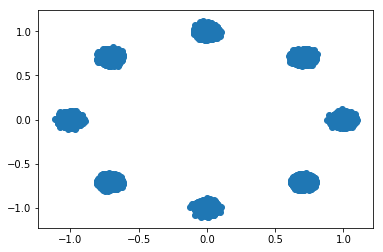

In [6]:
print(len(samples))
print(len(samples[0]))
#print(len(samples[0][0]))
print(samples.T)

x= samples.T[0]
y = samples.T[1]
plt.scatter(x,y)

In [7]:
netG = nn.Sequential()
with netG.name_scope():
    
    #Convolutional
    #initially 128 x 100 x 2
#     netG.add(nn.Conv1DTranspose(50, 4, in_channels = 100, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     # should now be 128 x 50 x 2
#     netG.add(nn.Conv1DTranspose(25, 4, in_channels = 50, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     # should still be 128 x 25 x 2
#     netG.add(nn.Conv1DTranspose(5, 4, in_channels = 25, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     #should still be 128 x 5 x 2
#     netG.add(nn.Conv1DTranspose(2, 4,  in_channels = 5, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     #should still be 128 x 2 x 2
#     netG.add(nn.Conv1DTranspose(1, 4,  in_channels = 2, padding = 2, strides =2))
#     netG.add(nn.LeakyReLU(0.2))
#     #should still be 128 x 1 x 2
    
    
    #Dense
    #initially 128 x 100 x 2
    netG.add(nn.Dense(1280))
    netG.add(nn.LeakyReLU(0.2))
    netG.add(nn.Dropout(0.5))
    #netG.add(nn.Dense(640))
    #netG.add(nn.LeakyReLU(0.2))
    netG.add(nn.Dense(256))
    netG.add(nn.Dropout(0.5))
    #netG.add(nn.LeakyReLU(0.2))
    netG.add(nn.Dense(2))
    
    

In [8]:
netD1 = nn.Sequential()
with netD1.name_scope():
    
    #Convolutional
    #input is 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, strides = 2,padding = 2, in_channels = 1))
#     # should still be 256 x 1 x 1


    #Dense
    netD1.add(nn.Dense(256))
    netD1.add(nn.Dropout(0.5))
    netD1.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dense(100))
    #netD.add(nn.LeakyReLU(0.2))
    netD1.add(nn.Dense(32))
    netD1.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dropout(0.5))
    netD1.add(nn.Dense(1))
    
    
    


In [9]:
netD2 = nn.Sequential()
with netD2.name_scope():
    
    #Convolutional
    #input is 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, strides = 2,padding = 2, in_channels = 1))
#     # should still be 256 x 1 x 1


    #Dense
    netD2.add(nn.Dense(256))
    netD2.add(nn.Dropout(0.5))
    netD2.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dense(100))
    #netD.add(nn.LeakyReLU(0.2))
    netD2.add(nn.Dense(128))
    netD2.add(nn.LeakyReLU(0.2))
    #netD.add(nn.Dropout(0.5))
    netD2.add(nn.Dense(1))

In [10]:
loss = gluon.loss.SigmoidBinaryCrossEntropyLoss()

netG.initialize(mx.init.Normal(0.1), ctx = ctx)
netD1.initialize(mx.init.Normal(0.1), ctx = ctx)
netD2.initialize(mx.init.Normal(0.1), ctx = ctx)

trainerG = gluon.Trainer(netG.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
trainerD1 = gluon.Trainer(netD1.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
trainerD2 = gluon.Trainer(netD2.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
#unrolledtrainerD = gluon.Trainer(netD.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})


Begin


INFO:root:
binary training acc at epoch 0: facc=0.995646
INFO:root:time: 8.161648
INFO:root:time: 8.163887


Epoch: 0
epoch 0
Plot 0


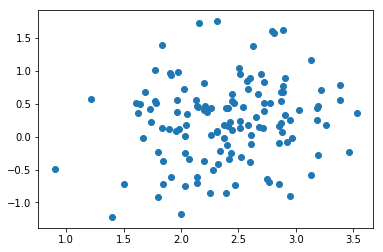

Plot 1


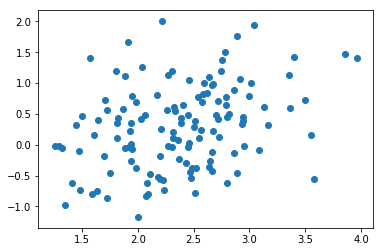

Plot 2


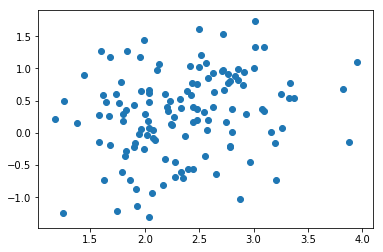

Plot 3


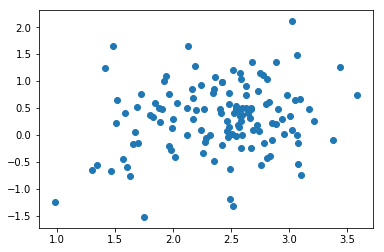

Plot 4


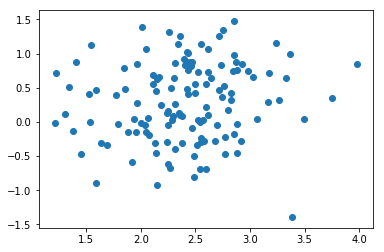


[[ 2.1299076   0.3994384 ]
 [ 2.5805285   0.74641174]
 [ 2.7772238   0.03086093]
 ...
 [ 3.0273004   0.6543818 ]
 [ 1.6919054  -0.3440145 ]
 [ 2.4345024   0.76409024]]
<NDArray 768x2 @gpu(0)>
Epoch: 100


INFO:root:
binary training acc at epoch 200: facc=0.697001
INFO:root:time: 8.175985
INFO:root:time: 8.176519


Epoch: 200
epoch 200
Plot 0


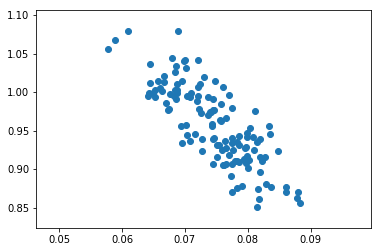

Plot 1


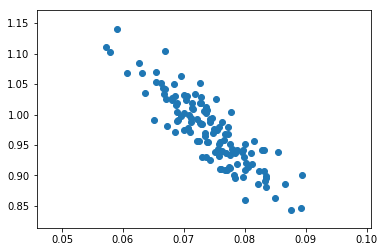

Plot 2


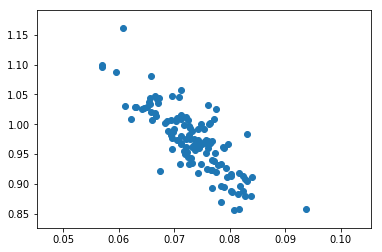

Plot 3


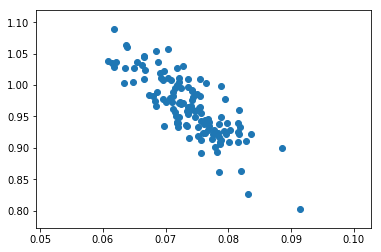

Plot 4


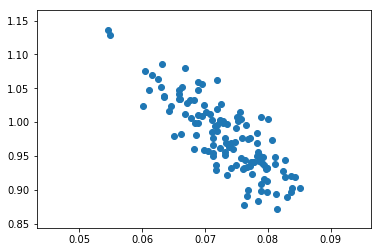


[[0.06771842 0.9645636 ]
 [0.07370883 0.9519913 ]
 [0.07769917 0.9677782 ]
 ...
 [0.07922857 0.9489411 ]
 [0.06150915 1.0694757 ]
 [0.07363662 0.9672849 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 300


INFO:root:
binary training acc at epoch 400: facc=0.800056
INFO:root:time: 8.179616
INFO:root:time: 8.180348


Epoch: 400
epoch 400
Plot 0


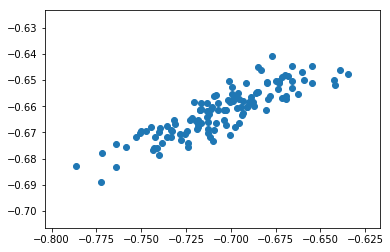

Plot 1


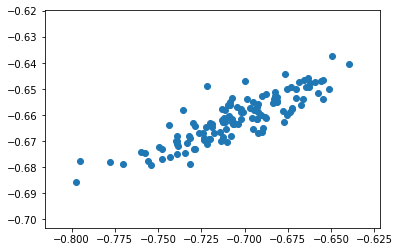

Plot 2


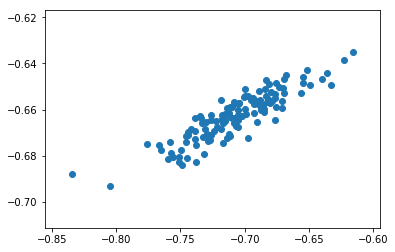

Plot 3


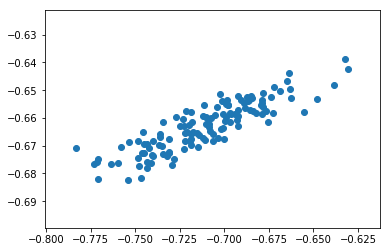

Plot 4


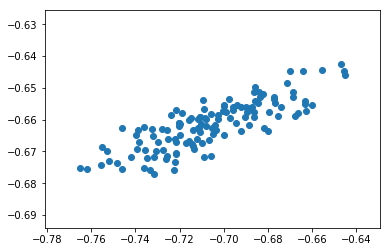


[[-0.67987347 -0.6535041 ]
 [-0.6520973  -0.6545077 ]
 [-0.6708657  -0.6448024 ]
 ...
 [-0.7196317  -0.66130936]
 [-0.72160184 -0.6568318 ]
 [-0.6862368  -0.65139943]]
<NDArray 768x2 @gpu(0)>
Epoch: 500


INFO:root:
binary training acc at epoch 600: facc=0.866398
INFO:root:time: 8.160655
INFO:root:time: 8.161307


Epoch: 600
epoch 600
Plot 0


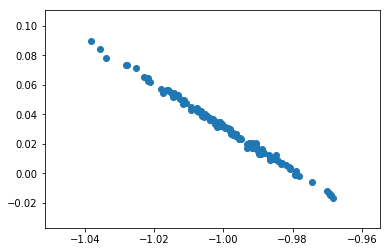

Plot 1


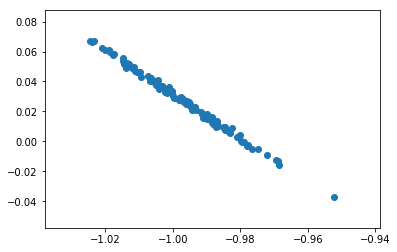

Plot 2


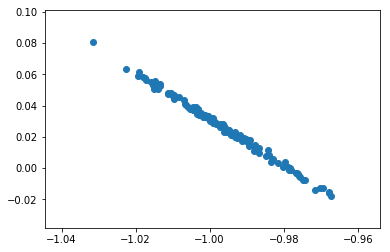

Plot 3


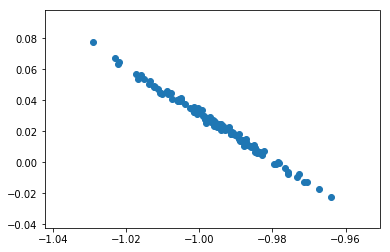

Plot 4


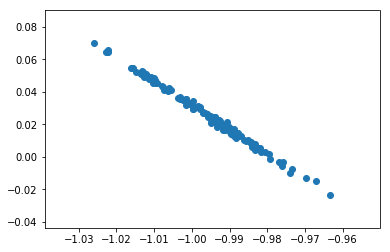


[[-0.9856964   0.01119268]
 [-1.0032192   0.03665197]
 [-0.98148847  0.00162756]
 ...
 [-0.9895098   0.01408917]
 [-1.0113004   0.04857206]
 [-0.9862459   0.01027173]]
<NDArray 768x2 @gpu(0)>
Epoch: 700


INFO:root:
binary training acc at epoch 800: facc=0.937500
INFO:root:time: 8.186920
INFO:root:time: 8.187359


Epoch: 800
epoch 800
Plot 0


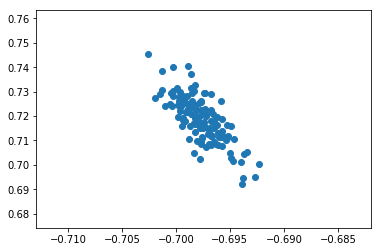

Plot 1


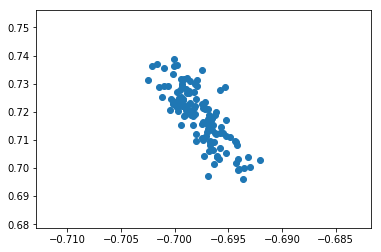

Plot 2


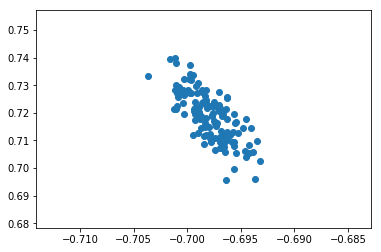

Plot 3


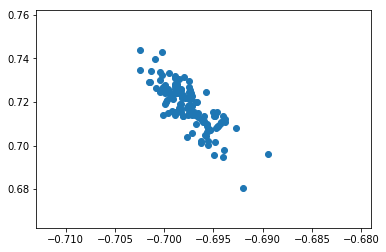

Plot 4


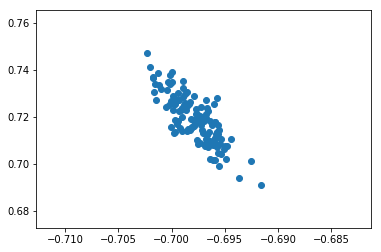


[[-0.69762164  0.7149032 ]
 [-0.6979699   0.7128798 ]
 [-0.69295084  0.7067821 ]
 ...
 [-0.7016004   0.73392165]
 [-0.6953677   0.71027523]
 [-0.6971477   0.7144152 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 900


INFO:root:
binary training acc at epoch 1000: facc=0.890705
INFO:root:time: 8.153113
INFO:root:time: 8.153700


Epoch: 1000
epoch 1000
Plot 0


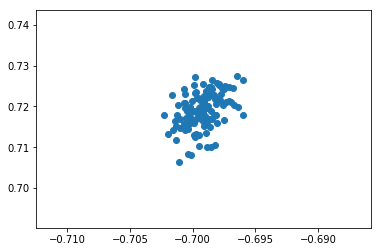

Plot 1


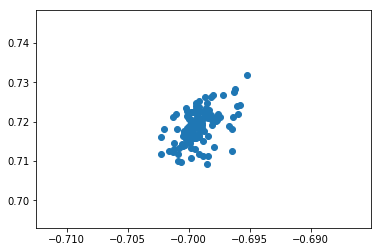

Plot 2


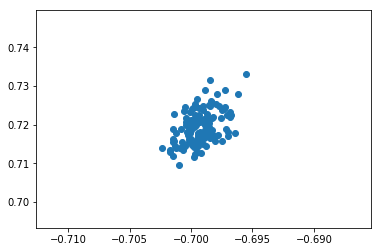

Plot 3


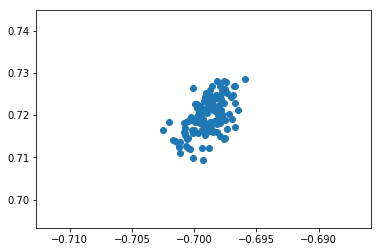

Plot 4


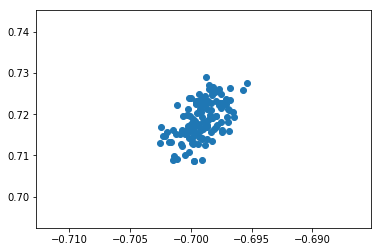


[[-0.70076513  0.7210368 ]
 [-0.7010062   0.71535563]
 [-0.70058745  0.7123686 ]
 ...
 [-0.69843155  0.71989   ]
 [-0.6979478   0.7168404 ]
 [-0.6996177   0.718382  ]]
<NDArray 768x2 @gpu(0)>
Epoch: 1100


INFO:root:
binary training acc at epoch 1200: facc=0.912422
INFO:root:time: 8.138568
INFO:root:time: 8.139273


Epoch: 1200
epoch 1200
Plot 0


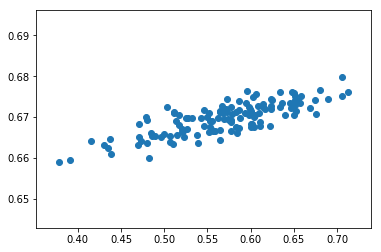

Plot 1


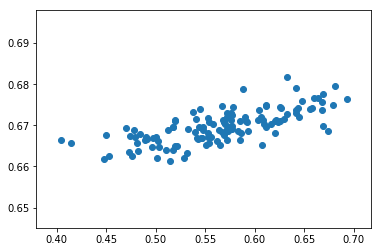

Plot 2


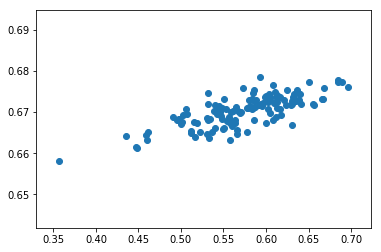

Plot 3


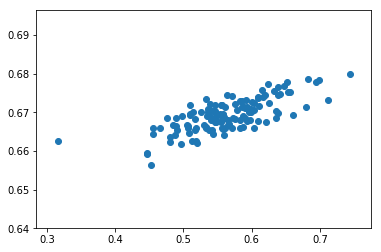

Plot 4


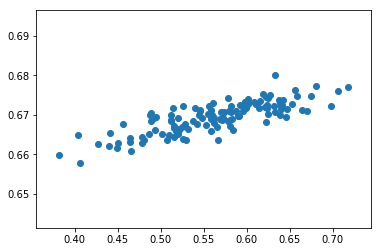


[[0.5664856  0.67111146]
 [0.6087453  0.6712158 ]
 [0.66076154 0.6750613 ]
 ...
 [0.5592682  0.66990954]
 [0.5982581  0.67319316]
 [0.6699373  0.67085075]]
<NDArray 768x2 @gpu(0)>
Epoch: 1300


INFO:root:
binary training acc at epoch 1400: facc=0.937500
INFO:root:time: 8.164122
INFO:root:time: 8.164641


Epoch: 1400
epoch 1400
Plot 0


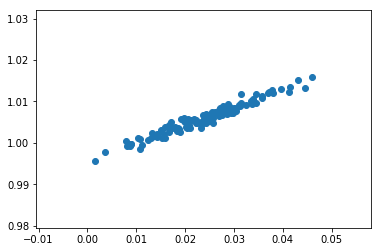

Plot 1


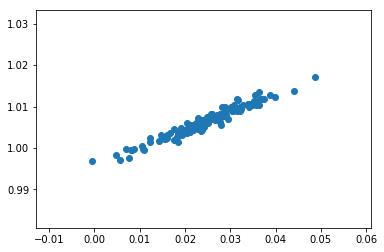

Plot 2


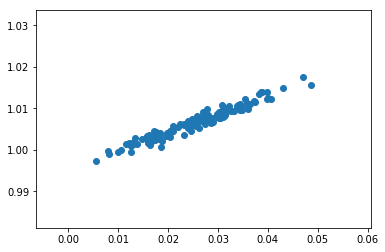

Plot 3


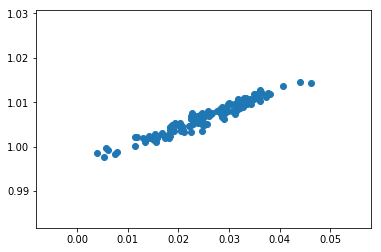

Plot 4


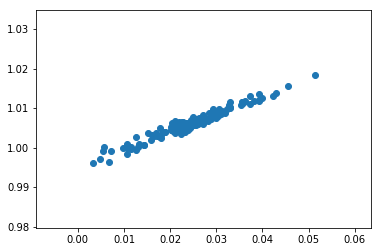


[[0.01904076 1.004254  ]
 [0.01242465 0.999564  ]
 [0.02659672 1.0065458 ]
 ...
 [0.02618134 1.0074968 ]
 [0.02674192 1.0068542 ]
 [0.02279556 1.0065225 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 1500


INFO:root:
binary training acc at epoch 1600: facc=0.811970
INFO:root:time: 8.158143
INFO:root:time: 8.158790


Epoch: 1600
epoch 1600
Plot 0


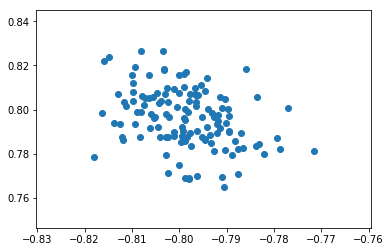

Plot 1


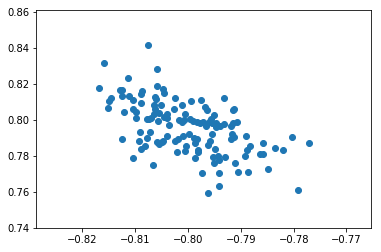

Plot 2


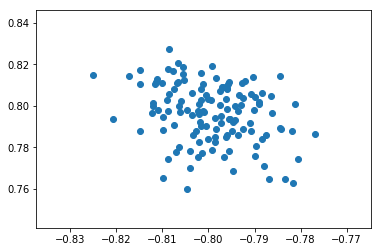

Plot 3


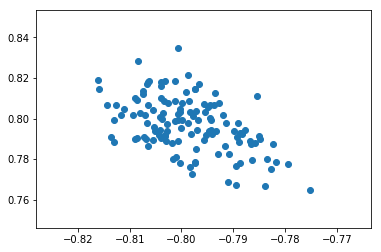

Plot 4


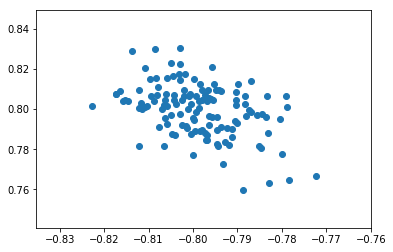


[[-0.79776233  0.7708847 ]
 [-0.80725515  0.80584276]
 [-0.7934583   0.7875159 ]
 ...
 [-0.7986425   0.80403745]
 [-0.7984164   0.81258535]
 [-0.80650634  0.781664  ]]
<NDArray 768x2 @gpu(0)>
Epoch: 1700


INFO:root:
binary training acc at epoch 1800: facc=0.862949
INFO:root:time: 8.225937
INFO:root:time: 8.226676


Epoch: 1800
epoch 1800
Plot 0


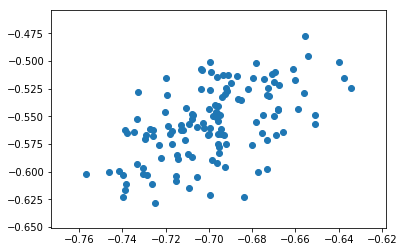

Plot 1


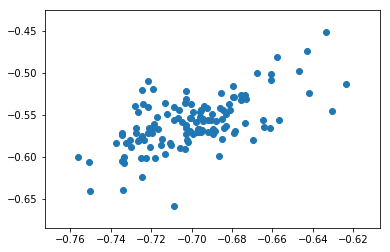

Plot 2


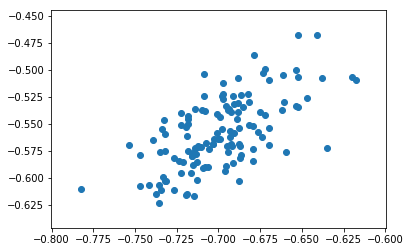

Plot 3


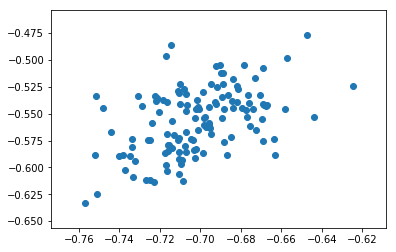

Plot 4


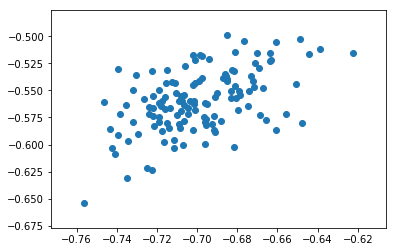


[[-0.69580084 -0.53356737]
 [-0.72056514 -0.60846025]
 [-0.70374125 -0.54323727]
 ...
 [-0.67297244 -0.5370236 ]
 [-0.6817879  -0.5323134 ]
 [-0.6855213  -0.53642124]]
<NDArray 768x2 @gpu(0)>
Epoch: 1900


INFO:root:
binary training acc at epoch 2000: facc=0.937469
INFO:root:time: 8.131788
INFO:root:time: 8.132226


Epoch: 2000
epoch 2000
Plot 0


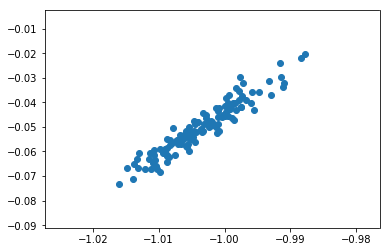

Plot 1


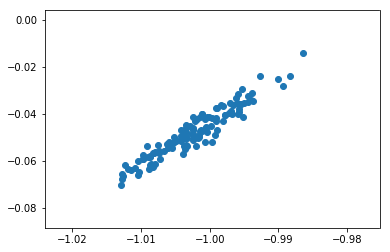

Plot 2


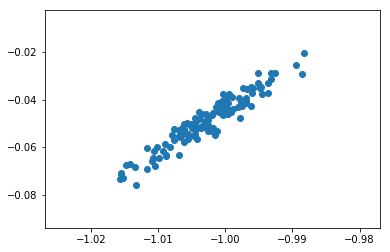

Plot 3


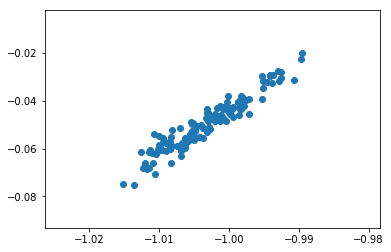

Plot 4


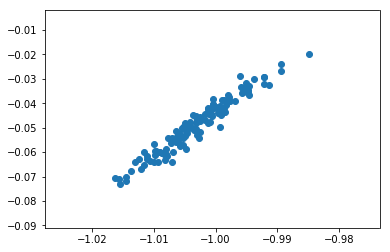


[[-1.0095012  -0.06288904]
 [-0.9986911  -0.0441072 ]
 [-1.0061724  -0.05263722]
 ...
 [-0.99959725 -0.04393542]
 [-1.008142   -0.06314093]
 [-1.0040762  -0.04784018]]
<NDArray 768x2 @gpu(0)>
Epoch: 2100


INFO:root:
binary training acc at epoch 2200: facc=0.937500
INFO:root:time: 8.180623
INFO:root:time: 8.181317


Epoch: 2200
epoch 2200
Plot 0


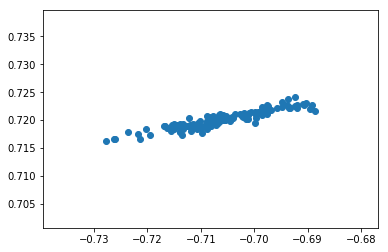

Plot 1


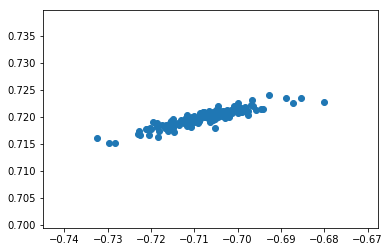

Plot 2


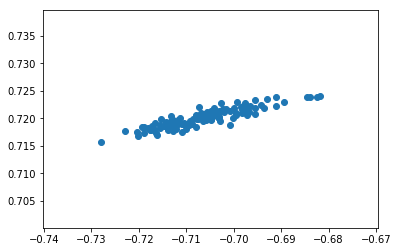

Plot 3


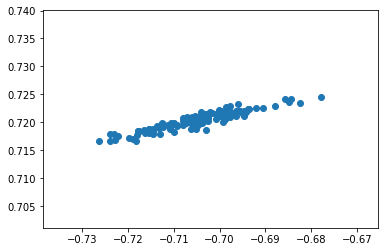

Plot 4


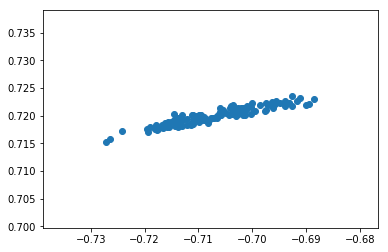


[[-0.71144956  0.7204113 ]
 [-0.7000478   0.7199301 ]
 [-0.7066685   0.7204731 ]
 ...
 [-0.7176899   0.71739864]
 [-0.70294863  0.7200132 ]
 [-0.700282    0.72154063]]
<NDArray 768x2 @gpu(0)>
Epoch: 2300


INFO:root:
binary training acc at epoch 2400: facc=0.822456
INFO:root:time: 8.148768
INFO:root:time: 8.149380


Epoch: 2400
epoch 2400
Plot 0


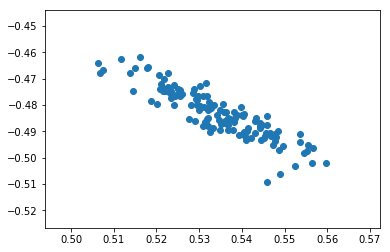

Plot 1


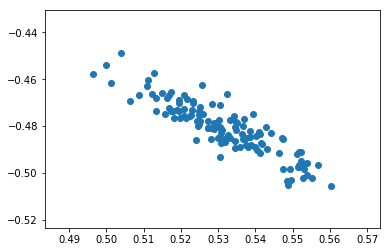

Plot 2


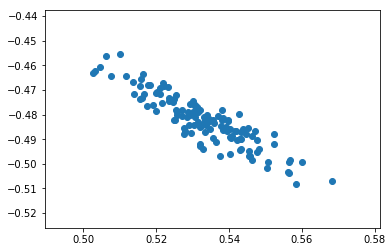

Plot 3


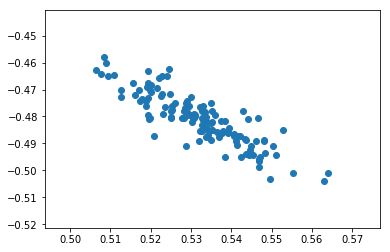

Plot 4


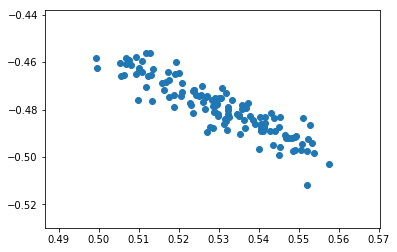


[[ 0.5389049  -0.48885682]
 [ 0.5414313  -0.48293647]
 [ 0.5222485  -0.4717966 ]
 ...
 [ 0.53057694 -0.47504827]
 [ 0.5267433  -0.47476926]
 [ 0.52364206 -0.4720969 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 2500


INFO:root:
binary training acc at epoch 2600: facc=0.749847
INFO:root:time: 8.173614
INFO:root:time: 8.174074


Epoch: 2600
epoch 2600
Plot 0


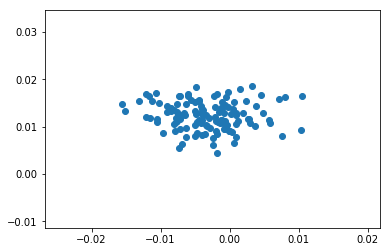

Plot 1


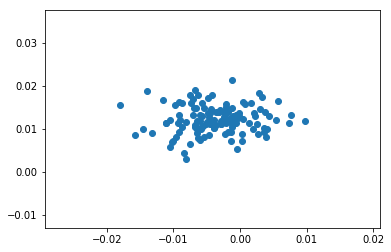

Plot 2


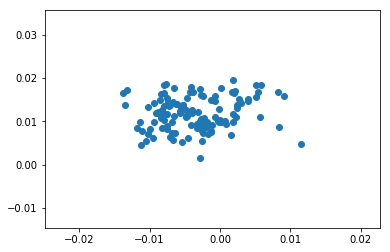

Plot 3


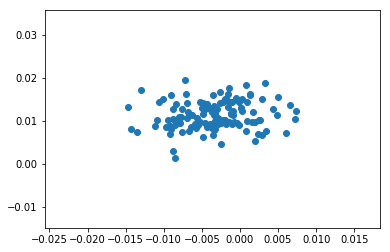

Plot 4


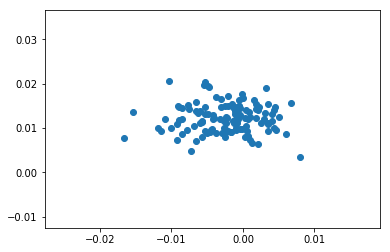


[[-0.00364232  0.00915033]
 [-0.00400317  0.00945023]
 [-0.00947928  0.00769013]
 ...
 [-0.00501078  0.00883865]
 [-0.00111246  0.01372439]
 [-0.01002306  0.00996271]]
<NDArray 768x2 @gpu(0)>


In [11]:
from datetime import datetime
import time
import logging

real_label = nd.ones((batch_size * 4,), ctx = ctx)
fake_label = nd.zeros((batch_size * 4,), ctx = ctx)

def facc(label, pred):
    pred = pred.ravel()
    label = label.ravel()
    return ((pred>0.5) == label).mean()
metric = mx.metric.CustomMetric(facc)


stamp =  datetime.now().strftime('%Y_%m_%d-%H_%M')
logging.basicConfig(level=logging.DEBUG)
print("Begin")


#set up Discriminator first

for i in range(100):
    tic = time.time()
    btic = time.time()
    train_data.reset()
    iter = 0
    #print("RUNNING")
    for batch1 in train_data:
        batch2 = next(train_data, batch1)
        batch3 = next(train_data, batch1)
        batch4 = next(train_data, batch1)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################

        data = (mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0], dim = 0)).as_in_context(ctx)
        
        
        
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        real_label_noise = mx.ndarray.add(real_label, noise)
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        fake_label_noise = mx.ndarray.add(fake_label, noise)
        #print("TESTING 123")
        #print(real_label_noise)
        #print(fake_label_noise)
        #print("THIS IS A CHECK")
        #print(data)
        #print(len(data))
        #print(len(data[0]))
        #print(len(data[0][0]))
        #print(len(batch1.data[0]))
        #print(len(batch1.data[0][0]))
        #print(len(batch1.data[0][0][0]))
        #print(len(batch2.data[0]))
        #print(len(batch2.data[0][0]))
        #print(len(batch2.data[0][0][0]))
        #print(data)
        
        
        latent_z1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z2 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z3 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z4 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)

        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD1(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD1_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label,], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)
            
            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)
            

            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print("TESTING")
            #print(len(fake))
            output = netD1(fake.detach()).reshape((-1, 1))
            errD1_fake = loss(output, fake_label_noise)
            errD1 = errD1_real + errD1_fake
            errD1.backward()
            metric.update([fake_label,], [output,])

        trainerD1.step(data.shape[0])
        
        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD2(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD2_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label,], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)
            
            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)
            

            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print("TESTING")
            #print(len(fake))
            output = netD2(fake.detach()).reshape((-1, 1))
            errD2_fake = loss(output, fake_label_noise)
            errD2 = errD2_real + errD2_fake
            errD2.backward()
            metric.update([fake_label,], [output,])

        trainerD2.step(data.shape[0])
        
        
        
    name, acc = metric.get()
    metric.reset()
    
# print("Done setting up Discriminator")
for epoch in range(epochs+1):
    train_data.reset()
    tic = time.time()
    btic = time.time()
    iter = 0
    #print("RUNNING")
    for batch1 in train_data:
        batch2 = next(train_data, batch1)
        batch3 = next(train_data, batch1)
        batch4 = next(train_data, batch1)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################

        data = (mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0], dim = 0)).as_in_context(ctx)
        
        
        
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        real_label_noise = mx.ndarray.add(real_label, noise)
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        fake_label_noise = mx.ndarray.add(fake_label, noise)
        #print("THIS IS A CHECK")
        #print(data)
        #print(len(data))
        #print(len(data[0]))
        #print(len(data[0][0]))
        #print(len(batch1.data[0]))
        #print(len(batch1.data[0][0]))
        #print(len(batch1.data[0][0][0]))
        #print(len(batch2.data[0]))
        #print(len(batch2.data[0][0]))
        #print(len(batch2.data[0][0][0]))
        #print(data)
        
        
        latent_z1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z2 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z3 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z4 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        if(epoch%2 == 0):
            with autograd.record():
                # train with real image
                #print("Real Data")
                #print(data)
                output = netD1(data).reshape((-1, 1))
                #print("Output of Discriminator")
                #print(output)
                errD1_real = loss(output, real_label_noise)
                #print("This is the guess for real")
                #print(output)
                metric.update([real_label], [output,])

                # train with fake image
                firstFake = netG(latent_z1)
                secondFake = netG(latent_z2)
                thirdFake = netG(latent_z3)
                fourthFake = netG(latent_z4)
                #print("testing 1")
                #print(firstFake)

                #only add if using dense
                #firstFake = firstFake.reshape((128, 1, 2))
                #secondFake = secondFake.reshape((128, 1, 2))  
                #print("testing 2")
                #print(firstFake)


                fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
                #print("TESTING")
                #print(len(fake))
                output = netD1(fake.detach()).reshape((-1, 1))
                errD1_fake = loss(output, fake_label_noise)
                errD1 = errD1_real + errD1_fake
                errD1.backward()
                metric.update([fake_label,], [output,])

            trainerD1.step(data.shape[0])
        else:
            with autograd.record():
                # train with real image
                #print("Real Data")
                #print(data)
                output = netD2(data).reshape((-1, 1))
                #print("Output of Discriminator")
                #print(output)
                errD2_real = loss(output, real_label_noise)
                #print("This is the guess for real")
                #print(output)
                metric.update([real_label], [output,])

                # train with fake image
                firstFake = netG(latent_z1)
                secondFake = netG(latent_z2)
                thirdFake = netG(latent_z3)
                fourthFake = netG(latent_z4)
                #print("testing 1")
                #print(firstFake)

                #only add if using dense
                #firstFake = firstFake.reshape((128, 1, 2))
                #secondFake = secondFake.reshape((128, 1, 2))  
                #print("testing 2")
                #print(firstFake)


                fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
                #print("TESTING")
                #print(len(fake))
                output = netD2(fake.detach()).reshape((-1, 1))
                errD2_fake = loss(output, fake_label_noise)
                errD2 = errD2_real + errD2_fake
                errD2.backward()
                metric.update([fake_label,], [output,])

            trainerD2.step(data.shape[0])
            
            
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        with autograd.record():
            fake1 = netG(latent_z1)
            fake2 = netG(latent_z2)
            fake3 = netG(latent_z3)
            fake4 = netG(latent_z4)
            #print(fake1)
            #rint(fake1.T)
            #print(fake1.T[0])
           # print(fake1.T[0][1])
            
            
            #only add if using dense
            #fake1 = fake1.reshape((128, 1, 2))
            #fake2 = fake2.reshape((128, 1, 2))
            
            output = netD1(mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)).reshape((-1, 1))
            errG = loss(output, real_label_noise)
            errG.backward()

        trainerG.step(mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0]).shape[0])
        
        with autograd.record():
            fake1 = netG(latent_z1)
            fake2 = netG(latent_z2)
            fake3 = netG(latent_z3)
            fake4 = netG(latent_z4)
            #print(fake1)
            #rint(fake1.T)
            #print(fake1.T[0])
           # print(fake1.T[0][1])
            
            
            #only add if using dense
            #fake1 = fake1.reshape((128, 1, 2))
            #fake2 = fake2.reshape((128, 1, 2))
            
            output = netD2(mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)).reshape((-1, 1))
            errG = loss(output, real_label_noise)
            errG.backward()

        trainerG.step(mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0]).shape[0])
        
        
        

        # Print log infomation every ten batches
        if iter % 10 == 0:
            name, acc = metric.get()
            #logging.firstFake info('speed: {} samples/s'.format(batch_size / (time.time() - btic)))
            #logging.info('discriminator loss = %f, generator loss = %f, binary training acc = %f at iter %d epoch %d'
            #         %(nd.mean(errD).asscalar(),
            #           nd.mean(errG).asscalar(), acc, iter, epoch))
        iter = iter + 1
        btic = time.time()

    name, acc = metric.get()
    if acc == 1.0 and epoch >201:
        print("FAIL")
        sys.exit("D too good")
    metric.reset()
    #logging.info('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
    #logging.info('time: %f' % (time.time() - tic))

    #Visualize one generated image for each epoch
    fake_img = fake1[0]
    #print("testing")
    #print("Fake data")
    #print(fake1)
    ##print("fake data transposed")
    #print(fake1.T)
    #print(len(fake))0
    #print(len(fake[0]))
    #print(len(fake[0][0]))
    #print(fake)
    
    
    #test small print
    #print("epoch %d" % (epoch))
    #print("X: %s   Y: %s  " % (fake_img[0][0],fake_img[0][1]))
    #x= fake.T[0][0].asnumpy().tolist()
    #y = fake.T[1][0].asnumpy().tolist()
    #print("Plot")
    #plt.scatter(x,y)
    #plt.show()
    
    
    
    
    #real print
    if(epoch%100 ==0):
        print("Epoch: %d" % epoch)
    if(epoch%200 == 0):# or epoch % 200 == 1 or epoch % 200 == 2 or epoch % 200 == 3):
        logging.info('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
        logging.info('time: %f' % (time.time() - tic))
        logging.info('time: %f' % (time.time() - tic))
        print("epoch %d" % (epoch))
        
        #For convolution?
        #print("X: %s   Y: %s  " % (fake_img[0][0],fake_img[0][1]))
        #x= fake1.T[0][0].asnumpy().tolist()
        #y = fake1.T[0][1].asnumpy().tolist()
        latent1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        fake = netG(latent1)
        for i in range(5):
            latent = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
            fakeadd = netG(latent)
            x = fakeadd.T[0].asnumpy().tolist()
            y = fakeadd.T[1].asnumpy().tolist()
            print("Plot %d" % i)
            plt.scatter(x,y)
            plt.show()
            fake = mx.ndarray.concat(fake, fakeadd, dim = 0)
        #fake = mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)
        

        #print("X: ")
        #print(fake.T[0][0])
        #print("Y: ")
        #print(fake.T[0][1])
        #print("")
        #print("")
        print(fake)


        #plt.show()   
    
    # visualize(fake_img)
    # plt.show()
